# SIB Success Prediction

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### Import Datasets

In [5]:
# preview 1 of 4 datasets  

projects = pd.read_csv('Structured_Projects_Data.csv') 
print(projects.shape)
projects.head()

(314, 44)


,ID,Impact Bond Name,Stage of Development,Dates - Date outcomes contract signed - (Value),Dates - Date contracts between all parties signed - (Value),Dates - Anticipated completion date - (Value),Dates - Actual completion date - (Value),Dates - Start date of service provision - (Value),Dates - Anticipated end date of service provision - (Value),Dates - Actual end date of service provision - (Value),...,Purpose and classifications - Social challenge - (Value),Purpose and classifications - Policy sector - (Value),Purpose and classifications - Primary SDG goal - (Value),Purpose and classifications - Secondary SDG goals - (Value),Purpose and classifications - Primary SDG target - (Value),Purpose and classifications - Secondary SDG targets - (Value),Service and beneficiaries - Target population - (Value),Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value),Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value),success
0,INDIGO-POJ-0001,Proyecta Tu Futuro [Plan Your Future] - Buenos...,Complete,2010-07-24,2010-07-24,2013-02-06,2013-02-06,2010-07-24,2013-02-06,2013-02-06,...,Homelessness,Education,SDG 4,SDG 3,Target 10.4,Target 1.1,Youth,438,359,1
1,INDIGO-POJ-0002,Aspire Social Impact Bond Adelaide,Implementation,2024-07-29,2024-07-29,2029-07-04,2029-07-04,2024-07-29,2029-07-04,2029-07-04,...,Homelessness,Education,SDG 15,SDG 9,Target 1.2,Target 7.3,Refugees,420,275,1
2,INDIGO-POJ-0003,Benevolent Society Social Benefit Bond (New So...,Planned,2018-07-10,2018-07-10,2020-01-24,2020-01-24,2018-07-10,2020-01-24,2020-01-24,...,Mental health,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4,Youth,500,390,1
3,INDIGO-POJ-0004,Journey to Social Inclusion (Victoria),Implementation,2025-10-20,2025-10-20,2027-03-11,2027-03-11,2025-10-20,2027-03-11,2027-03-11,...,Homelessness,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4,Refugees,579,539,1
4,INDIGO-POJ-0005,New South Wales Newpin Social Benefit Bond,Complete,2025-09-28,2025-09-28,2030-07-28,2030-07-28,2025-09-28,2030-07-28,2030-07-28,...,Mental health,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5,Women,532,386,1


In [6]:
# preview 2 of 4 datasets  

investments = pd.read_csv('Structured_Project_Investments.csv')
print(investments.shape)
investments.head()

(314, 4)


,Project ID,Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,432977.06,309846.19,585.54


In [7]:
# preview 3 of 4 datasets  

metrics = pd.read_csv('Structured_Outcome_Metrics.csv')
print(metrics.shape)
metrics.head()

(314, 13)


,Project ID,Outcome Metric ID,Outcome Pricing,Outcome Definition - (Value),Target Population - (Value),Targeted number of service users Or beneficiaries (total) - (Value),Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),Secondary SDG goals - (Value),Primary SDG target - (Value),Secondary SDG targets - (Value)
0,INDIGO-POJ-0001,metric-0001,405.89,Improved outcomes for individuals in education...,Youth,438,Individual,284,Education,SDG 4,SDG 3,Target 10.4,Target 1.1
1,INDIGO-POJ-0002,metric-0002,752.29,Improved outcomes for individuals in education...,Refugees,420,Individual,273,Education,SDG 15,SDG 9,Target 1.2,Target 7.3
2,INDIGO-POJ-0003,metric-0003,158.82,Improved outcomes for individuals in criminal ...,Youth,500,Individual,300,Criminal justice,SDG 9,SDG 2,Target 8.5,Target 2.4
3,INDIGO-POJ-0004,metric-0004,383.76,Improved outcomes for households in employment...,Refugees,579,Household,347,Employment and training,SDG 3,SDG 8,Target 2.4,Target 5.4
4,INDIGO-POJ-0005,metric-0005,585.54,Improved outcomes for households in criminal j...,Women,532,Household,319,Criminal justice,SDG 8,SDG 6,Target 8.4,Target 5.5


In [8]:
# preview 4 of 4 datasets  

payments = pd.read_csv('Structured_Outcome_Payments.csv')
print(payments.shape)
payments.head()

(314, 8)


,Project ID,Outcome Metric Id - (Value),Period - Start - (Value),Period - End - (Value),Type - (Value),Payments - Currency - (Value),Payments - Amount - (Value),Payments - Amount USD - (Value)
0,INDIGO-POJ-0001,metric-0001,2023-05,2024-04,Actual,GBP,83613.34,91974.67
1,INDIGO-POJ-0002,metric-0002,2012-01,2012-07,Actual,CAD,136164.49,149780.94
2,INDIGO-POJ-0003,metric-0003,2019-09,2020-05,Actual,EUR,33352.20,36687.42
3,INDIGO-POJ-0004,metric-0004,2018-11,2019-04,Actual,USD,94788.72,104267.59
4,INDIGO-POJ-0005,metric-0005,2012-12,2013-09,Actual,USD,128233.26,141056.59


### Data Exploration and Cleaning

In [9]:
# checking attributes 

# First merge: projects + metrics
data = pd.merge(metrics, projects, left_on="Project ID", right_on="ID", how="left")

# Second merge: add investments
data = pd.merge(data, investments, on="Project ID", how="left")

# Check columns and shape
print(data.columns)
print(data.shape)
data.head()


Index(['Project ID', 'Outcome Metric ID', 'Outcome Pricing',
       'Outcome Definition - (Value)', 'Target Population - (Value)',
       'Targeted number of service users Or beneficiaries (total) - (Value)',
       'Unit type of targeted Service users or beneficiaries - (Value)',
       'Outcome metric target - (Value)', 'Policy sector - (Value)',
       'Primary SDG goal - (Value)', 'Secondary SDG goals - (Value)',
       'Primary SDG target - (Value)', 'Secondary SDG targets - (Value)', 'ID',
       'Impact Bond Name', 'Stage of Development',
       'Dates - Date outcomes contract signed - (Value)',
       'Dates - Date contracts between all parties signed - (Value)',
       'Dates - Anticipated completion date - (Value)',
       'Dates - Actual completion date - (Value)',
       'Dates - Start date of service provision - (Value)',
       'Dates - Anticipated end date of service provision - (Value)',
       'Dates - Actual end date of service provision - (Value)',
       'Dates - An

,Project ID,Outcome Metric ID,Outcome Pricing,Outcome Definition - (Value),Target Population - (Value),Targeted number of service users Or beneficiaries (total) - (Value),Unit type of targeted Service users or beneficiaries - (Value),Outcome metric target - (Value),Policy sector - (Value),Primary SDG goal - (Value),...,Purpose and classifications - Secondary SDG goals - (Value),Purpose and classifications - Primary SDG target - (Value),Purpose and classifications - Secondary SDG targets - (Value),Service and beneficiaries - Target population - (Value),Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value),Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value),success,Total investment commitment,Maximum potential outcome payment,Outcome pricing
0,INDIGO-POJ-0001,metric-0001,405.89,Improved outcomes for individuals in education...,Youth,438,Individual,284,Education,SDG 4,...,SDG 3,Target 10.4,Target 1.1,Youth,438,359,1,249816.05,203880.14,405.89
1,INDIGO-POJ-0002,metric-0002,752.29,Improved outcomes for individuals in education...,Refugees,420,Individual,273,Education,SDG 15,...,SDG 9,Target 1.2,Target 7.3,Refugees,420,275,1,162407.46,325905.17,752.29
2,INDIGO-POJ-0003,metric-0003,158.82,Improved outcomes for individuals in criminal ...,Youth,500,Individual,300,Criminal justice,SDG 9,...,SDG 2,Target 8.5,Target 2.4,Youth,500,390,1,123233.44,77460.18,158.82
3,INDIGO-POJ-0004,metric-0004,383.76,Improved outcomes for households in employment...,Refugees,579,Household,347,Employment and training,SDG 3,...,SDG 8,Target 2.4,Target 5.4,Refugees,579,539,1,108233.80,242217.67,383.76
4,INDIGO-POJ-0005,metric-0005,585.54,Improved outcomes for households in criminal j...,Women,532,Household,319,Criminal justice,SDG 8,...,SDG 6,Target 8.4,Target 5.5,Women,532,386,1,432977.06,309846.19,585.54


In [10]:
# drop duplicates 

data.drop_duplicates(inplace=True)
print(data.shape)
data.columns

(314, 60)


Index(['Project ID', 'Outcome Metric ID', 'Outcome Pricing',
       'Outcome Definition - (Value)', 'Target Population - (Value)',
       'Targeted number of service users Or beneficiaries (total) - (Value)',
       'Unit type of targeted Service users or beneficiaries - (Value)',
       'Outcome metric target - (Value)', 'Policy sector - (Value)',
       'Primary SDG goal - (Value)', 'Secondary SDG goals - (Value)',
       'Primary SDG target - (Value)', 'Secondary SDG targets - (Value)', 'ID',
       'Impact Bond Name', 'Stage of Development',
       'Dates - Date outcomes contract signed - (Value)',
       'Dates - Date contracts between all parties signed - (Value)',
       'Dates - Anticipated completion date - (Value)',
       'Dates - Actual completion date - (Value)',
       'Dates - Start date of service provision - (Value)',
       'Dates - Anticipated end date of service provision - (Value)',
       'Dates - Actual end date of service provision - (Value)',
       'Dates - An

In [11]:
# get rid of unnecessary attributes 

data = data.drop(columns=["Impact Bond Name",
                          "Dates - Date outcomes contract signed - (Value)",
                          "Dates - Start date of service provision - (Value)",
                          'Dates - Anticipated end date of service provision - (Value)',
                          'Dates - Actual end date of service provision - (Value)',
                          'Dates - Anticipated duration of service provision - (Value)',
                          'Overall project finance – currency',
                          'Overall project finance – minimum',
                          'Overall project finance – exact',
                          'Overall project finance – max',
                          'Overall project finance – minimum in USD',
                          'Overall project finance – exact in USD',
                          'Overall project finance – maximum in USD',
                          'Overall Project Finance – maximum potential loss',
                          'Overall Project Finance – maximum potential return type',
                          'Overall project finance – maximum potential return',
                          'Overall project finance – investor repayment',
                          'Overall project finance - Total outcome payments made - Currency - (Value)',
                          'Overall project finance - Total outcome payments made - Amount - (Value)',
                          'Overall project finance - Total outcome payments made - Amount USD - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Currency - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Amount - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Amount USD - (Value)',
                          'Investment Details - Total Funds Invested - Latest - Date - (Value)',
                          'Investment Details - Internal Rate of Return - Target - (Value)',
                          'Investment Details - Internal Rate of Return - Date - (Value)',
                          'Service and beneficiaries - Actual number of unique service users or beneficiaries engaged (total) - (Value)',
                          'Dates - Date contracts between all parties signed - (Value)',
                          'Dates - Anticipated completion date - (Value)',
                          'Dates - Actual completion date - (Value)',
                          'Project ID','Outcome Metric ID',
                          'Outcome pricing'
                          ])

print(data.shape)
data.columns

(314, 27)


Index(['Outcome Pricing', 'Outcome Definition - (Value)',
       'Target Population - (Value)',
       'Targeted number of service users Or beneficiaries (total) - (Value)',
       'Unit type of targeted Service users or beneficiaries - (Value)',
       'Outcome metric target - (Value)', 'Policy sector - (Value)',
       'Primary SDG goal - (Value)', 'Secondary SDG goals - (Value)',
       'Primary SDG target - (Value)', 'Secondary SDG targets - (Value)', 'ID',
       'Stage of Development',
       'Dates - Actual duration of service provision - (Value)',
       'Jurisdiction - Jurisdiction - (Value)',
       'Investment Details - Internal Rate of Return - Latest - (Value)',
       'Purpose and classifications - Social challenge - (Value)',
       'Purpose and classifications - Policy sector - (Value)',
       'Purpose and classifications - Primary SDG goal - (Value)',
       'Purpose and classifications - Secondary SDG goals - (Value)',
       'Purpose and classifications - Primary SD

In [12]:
# familiarize with data types 

print(data.dtypes)
print(data.shape)

Outcome Pricing                                                                                           float64
Outcome Definition - (Value)                                                                               object
Target Population - (Value)                                                                                object
Targeted number of service users Or beneficiaries (total) - (Value)                                         int64
Unit type of targeted Service users or beneficiaries - (Value)                                             object
Outcome metric target - (Value)                                                                             int64
Policy sector - (Value)                                                                                    object
Primary SDG goal - (Value)                                                                                 object
Secondary SDG goals - (Value)                                                           

In [13]:
# Cleaning SDG goal/target columns so they’re usable in models.
# They come in as strings like "SDG 1" or "Target 3.1", so I’m stripping the text part
# and converting the remaining numbers to floats.
# Just trying to make sure these can be treated as numeric features later.


data['Purpose and classifications - Primary SDG goal - (Value)'] = data['Purpose and classifications - Primary SDG goal - (Value)'].str.replace(r'sdg\s*', '', case=False, regex=True).astype(float)
data['Purpose and classifications - Secondary SDG goal - (Value)'] = data['Purpose and classifications - Secondary SDG goals - (Value)'].str.replace(r'sdg\s*', '', case=False, regex=True).astype(float)
data['Purpose and classifications - Primary SDG target - (Value)'] = data['Purpose and classifications - Primary SDG target - (Value)'].str.replace(r'Target\s*', '', case=False, regex=True).astype(float)
data['Purpose and classifications - Secondary SDG goal - (Value)'] = data['Purpose and classifications - Secondary SDG targets - (Value)'].str.replace(r'Target\s*', '', case=False, regex=True).astype(float)

In [14]:
print(data.dtypes)

Outcome Pricing                                                                                           float64
Outcome Definition - (Value)                                                                               object
Target Population - (Value)                                                                                object
Targeted number of service users Or beneficiaries (total) - (Value)                                         int64
Unit type of targeted Service users or beneficiaries - (Value)                                             object
Outcome metric target - (Value)                                                                             int64
Policy sector - (Value)                                                                                    object
Primary SDG goal - (Value)                                                                                 object
Secondary SDG goals - (Value)                                                           

/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

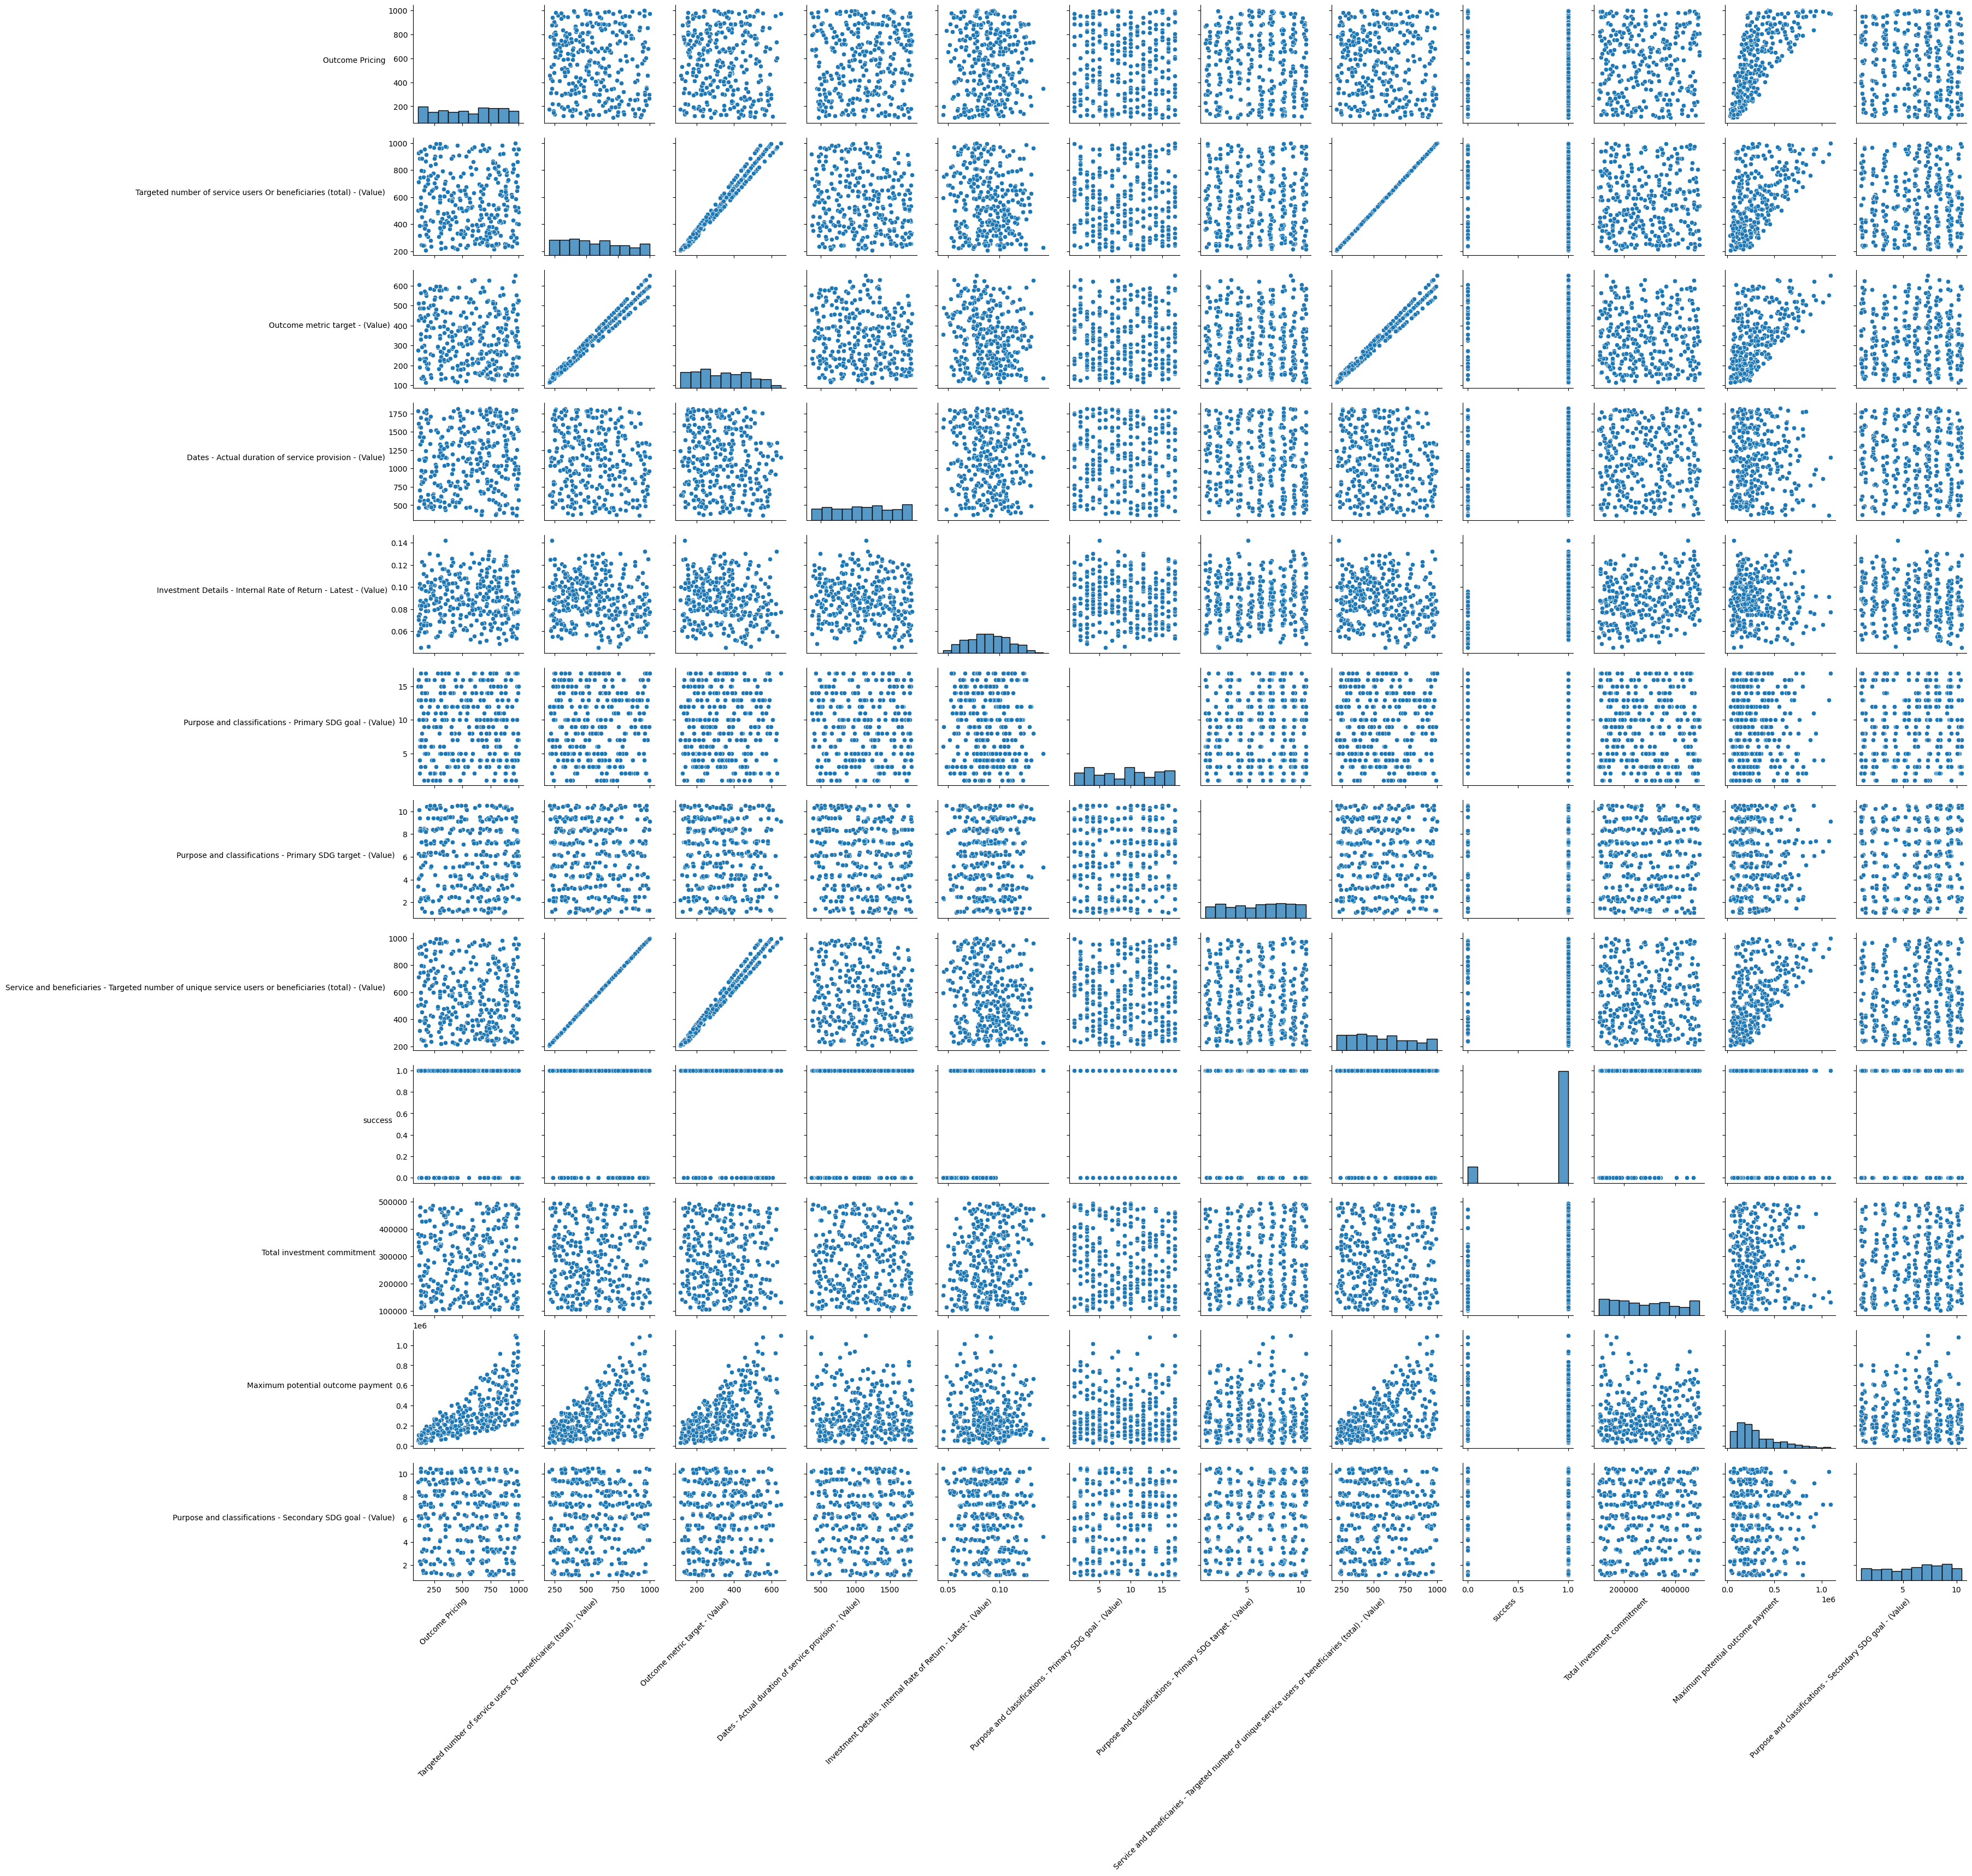

<Figure size 2000x600 with 0 Axes>

In [15]:
# Create a pairplot of all numerical features to explore pairwise relationships

g = sns.pairplot(data)
plt.figure(figsize=(20, 6)) 

# Rotate x and y axis labels
for ax in g.axes.flatten():
    if ax:  # check if axis is not None
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
        ax.set_ylabel(ax.get_ylabel(), rotation=0, ha='right')

plt.tight_layout()
plt.show()



### CREATION Model 1 of 3: Logistic Regression 

In [17]:
# Normalize column names
projects.columns = projects.columns.str.strip()
investments.columns = investments.columns.str.strip()

# Merge using left_on / right_on with different column names
df = pd.merge(projects, investments, left_on="ID", right_on="Project ID", how="left")

# Convert date columns to datetime
date_cols = [col for col in df.columns if 'Date' in col or 'duration' in col]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Duration differences
df['duration_gap_days'] = (df['Dates - Actual duration of service provision - (Value)'] -
                           df['Dates - Anticipated duration of service provision - (Value)']).dt.days

df['start_to_actual_end_days'] = (df['Dates - Actual end date of service provision - (Value)'] -
                                  df['Dates - Start date of service provision - (Value)']).dt.days

# A "pre-outcome" version of ROI (hypothetical potential ROI)
df['roi_estimate'] = df['Overall project finance – maximum potential return'] / \
                     df['Investment Details - Total Funds Invested - Latest - Amount USD - (Value)']


df['potential_return_to_loss'] = df['Overall project finance – maximum potential return'] / \
                                 df['Overall Project Finance – maximum potential loss']

# Remove leaking column (Actual IRR used to define success)
df.drop(columns=['Investment Details - Internal Rate of Return - Latest - (Value)'], inplace=True, errors='ignore')

# Drop non-predictive or identifier columns
df.drop(columns=['ID', 'Impact Bond Name', 'Project ID'], inplace=True, errors='ignore')

# Drop columns with too many missing values
df = df.dropna(axis=1, thresh=int(0.6 * len(df)))  # Drop columns with >40% missing

# Drop rows with any remaining missing data (or choose to impute)
df = df.dropna()

# Identify and encode categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Pre-investment only features
safe_features = [
    "Overall Project Finance – maximum potential loss",
    "Overall project finance – maximum potential return",
    "Maximum potential outcome payment",
    "potential_return_to_loss",
    "Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)",
    "roi_estimate"
]

# Filter X using only safe features
X = df[safe_features].copy()
y = df['success']


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC Score:", roc_auc_score(y_test, y_prob))


Confusion Matrix:
 [[ 0  8]
 [ 0 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        55

    accuracy                           0.87        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.76      0.87      0.81        63


ROC AUC Score: 0.7477272727272727


/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
# Feature importance
import pandas as pd
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
print(coef_df.sort_values(by='Coefficient', key=abs, ascending=False).head(10))

# Multicollinearity check (optional)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print(vif_data.sort_values('VIF', ascending=False).head(10))


                                             Feature  Coefficient
4  Service and beneficiaries - Targeted number of...    -0.424439
0   Overall Project Finance – maximum potential loss     0.344850
1  Overall project finance – maximum potential re...     0.344850
3                           potential_return_to_loss     0.250228
2                  Maximum potential outcome payment    -0.136597
5                                       roi_estimate    -0.027475
                                             Feature           VIF
0   Overall Project Finance – maximum potential loss  2.196878e+14
1  Overall project finance – maximum potential re...  2.196878e+14
3                           potential_return_to_loss  5.908396e+00
5                                       roi_estimate  1.635269e+00
4  Service and beneficiaries - Targeted number of...  1.476199e+00
2                  Maximum potential outcome payment  1.469627e+00


### TESTING Model 1 of 3: Logistic Regression 

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

lasso_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso_logreg", LogisticRegressionCV(
        cv=5,
        penalty='l1',
        solver='saga',
        max_iter=10000,
        scoring='roc_auc',
        random_state=42
    ))
])

lasso_pipe.fit(X_train, y_train)


# Use the same test set and model pipeline
y_prob = lasso_pipe.predict_proba(X_test)[:, 1]  # Probability of success
y_pred = lasso_pipe.predict(X_test)

# Create a results DataFrame
results = X_test.copy()
results['Predicted Success Probability'] = y_prob
results['Actual Success'] = y_test.values
results['Predicted Label'] = y_pred


In [22]:
# Define strategy: invest if probability > 0.7
results['Strategy Decision'] = results['Predicted Success Probability'] > 0.7

# Evaluate strategy performance
# Add back return column to X_test-based results DataFrame
results['Overall project finance – maximum potential return'] = df.loc[X_test.index, 'Overall project finance – maximum potential return'].values

strategy_df = results[results['Strategy Decision'] == True]
total_investments = len(strategy_df)
correct_predictions = (strategy_df['Actual Success'] == 1).sum()
strategy_accuracy = correct_predictions / total_investments

print(f"Logistic Regression Trading Strategy Results:")
print(f"Invested in {total_investments} projects.")
print(f"{correct_predictions} of them were actually successful.")
print(f"Strategy accuracy: {strategy_accuracy:.2%}")

# Merge back return/loss data
strategy_df = strategy_df.copy()
# Merge return column from original df
results['Overall project finance – maximum potential return'] = df.loc[X_test.index, 'Overall project finance – maximum potential return'].values
strategy_df = results[results['Strategy Decision'] == True].copy()
strategy_df['Expected Return'] = strategy_df['Predicted Success Probability'] * strategy_df['Overall project finance – maximum potential return']
strategy_df['Weighted Outcome'] = strategy_df['Expected Return'] * strategy_df['Actual Success']
total_return = strategy_df['Weighted Outcome'].sum()

print(f"Estimated total return on strategy portfolio: {total_return:,.2f}")


Logistic Regression Trading Strategy Results:
Invested in 59 projects.
53 of them were actually successful.
Strategy accuracy: 89.83%
Estimated total return on strategy portfolio: 3,576,077.17


### CREATION Model 2 of 3: Random Forest 

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Split the data
from sklearn.model_selection import train_test_split
safe_features = [
    "Overall Project Finance – maximum potential loss",
    "Overall project finance – maximum potential return",
    "Maximum potential outcome payment",
    "potential_return_to_loss",
    "Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)",
    "roi_estimate"
]

X = df[safe_features].copy()
y = df['success']



# Re-split and rerun your logistic/XGB/RF models using X_no_roi
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Fit the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'  # Helps with your class imbalance
)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Random Forest Results\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))
#print("Top features:", feature_importances.sort_values(ascending=False).head(10).index.tolist())
print(X.columns.tolist())



Random Forest Results

Confusion Matrix:
 [[ 1  7]
 [ 0 55]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.12      0.22         8
           1       0.89      1.00      0.94        55

    accuracy                           0.89        63
   macro avg       0.94      0.56      0.58        63
weighted avg       0.90      0.89      0.85        63

ROC AUC Score: 0.5681818181818181
['Overall Project Finance – maximum potential loss', 'Overall project finance – maximum potential return', 'Maximum potential outcome payment', 'potential_return_to_loss', 'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)', 'roi_estimate']


NameError: name 'top_features' is not defined

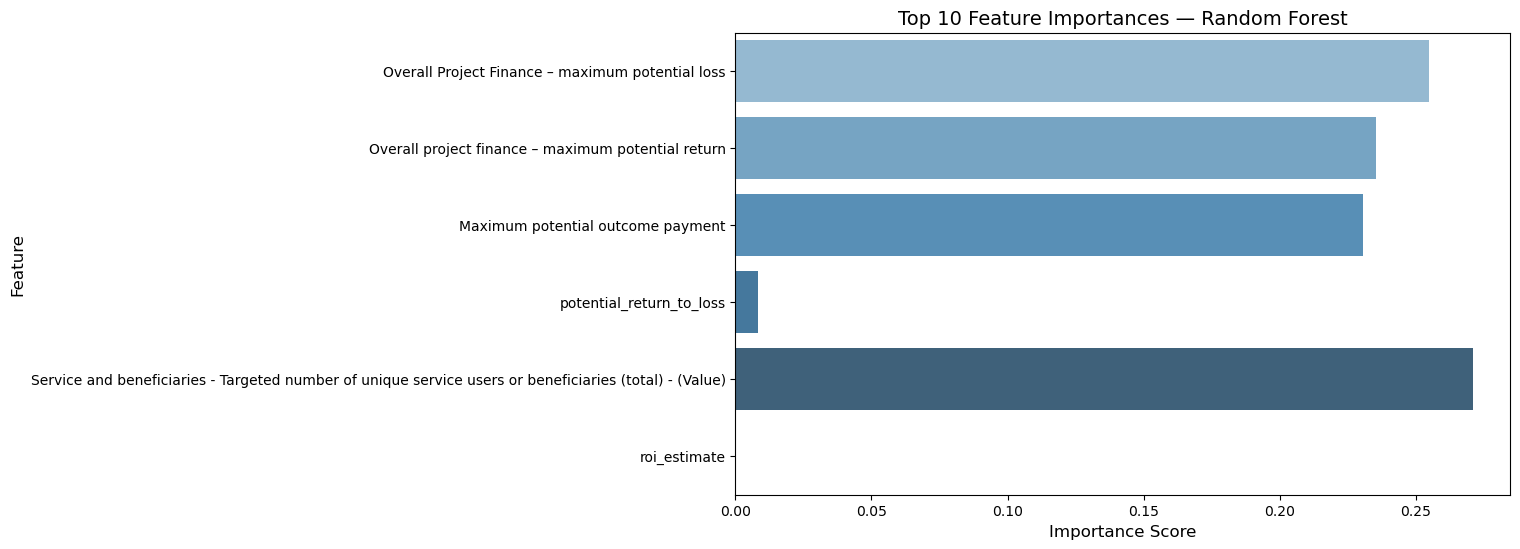

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare top features
# top_features = feature_importances.sort_values(ascending=False).head(10)
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)


# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=feature_importances.values,
    y=feature_importances.index,
    palette='Blues_d'
)

plt.title("Top 10 Feature Importances — Random Forest", fontsize=14)
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Feature", fontsize=12)

# Add value labels to the bars
for i, (value, name) in enumerate(zip(top_features.values, top_features.index)):
    plt.text(value + 0.001, i, f'{value:.3f}', va='center')

plt.tight_layout()
plt.show()


### CREATION Model 3 of 3: XGBoost 

In [25]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Split data (same as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Set up XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=(y == 0).sum() / (y == 1).sum(),  # adjust for imbalance
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Results\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))
print(X.columns.tolist())

XGBoost Results

Confusion Matrix:
 [[ 2  6]
 [11 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.15      0.25      0.19         8
           1       0.88      0.80      0.84        55

    accuracy                           0.73        63
   macro avg       0.52      0.53      0.51        63
weighted avg       0.79      0.73      0.76        63

ROC AUC Score: 0.5159090909090909
['Overall Project Finance – maximum potential loss', 'Overall project finance – maximum potential return', 'Maximum potential outcome payment', 'potential_return_to_loss', 'Service and beneficiaries - Targeted number of unique service users or beneficiaries (total) - (Value)', 'roi_estimate']


/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [01:31:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


/var/folders/7k/7cjm2x_d66z7_s7ngpjt8y5m0000gn/T/ipykernel_22169/3629811664.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


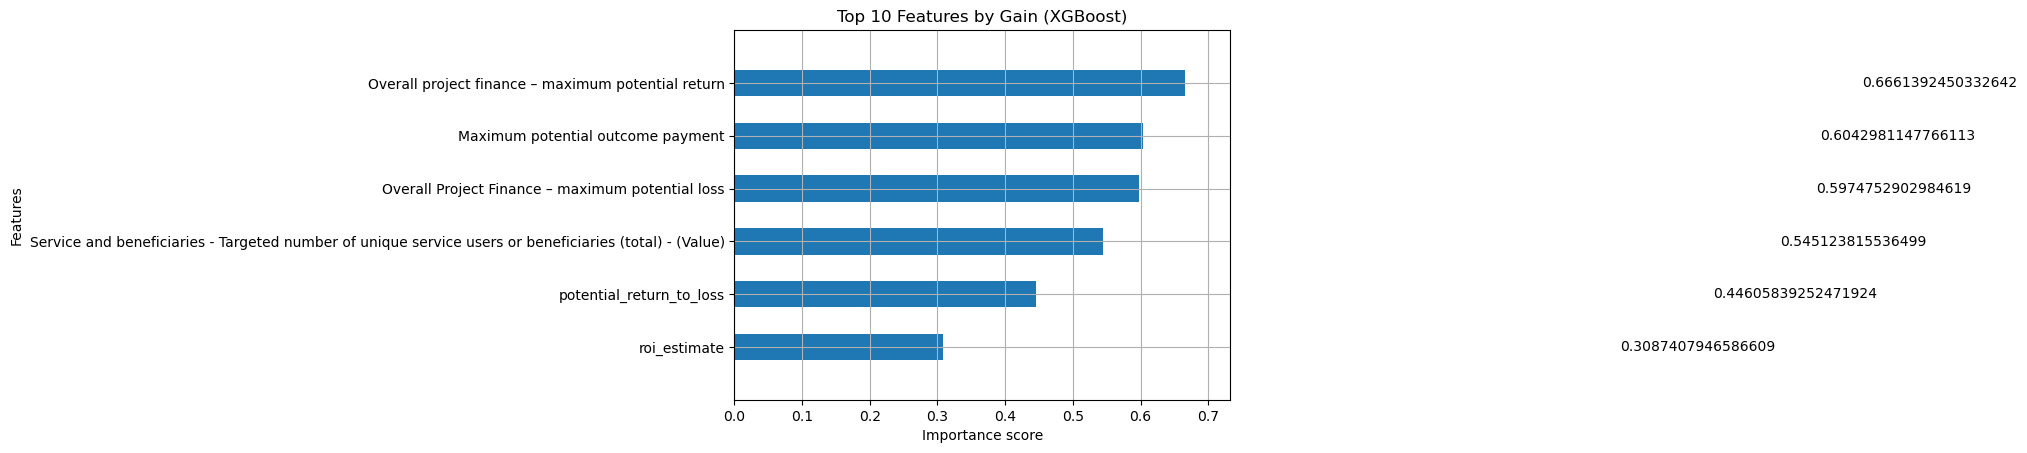

In [26]:
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.5)
plt.title("Top 10 Features by Gain (XGBoost)")
plt.tight_layout()
plt.show()

### TESTING Model 2 of 3: Random Forest and Model 3 of 3: XGBoost 

In [27]:
# Predict probabilities and labels
rf_probs = rf_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Add predictions to result DataFrames
rf_results = X_test.copy()
xgb_results = X_test.copy()

# Add actual labels
rf_results['Actual Success'] = y_test.values
xgb_results['Actual Success'] = y_test.values

# Add predictions and probabilities
rf_results['RF_Predicted Prob'] = rf_probs
rf_results['RF_Predicted Label'] = rf_preds

xgb_results['XGB_Predicted Prob'] = xgb_probs
xgb_results['XGB_Predicted Label'] = xgb_preds


# Merge return data for investment simulation
key_col = 'Overall project finance – maximum potential return'
rf_results[key_col] = df.loc[X_test.index, key_col].values
xgb_results[key_col] = df.loc[X_test.index, key_col].values

# Define investment strategy
rf_results['RF_Strategy Decision'] = rf_results['RF_Predicted Prob'] > 0.7
xgb_results['XGB_Strategy Decision'] = xgb_results['XGB_Predicted Prob'] > 0.7

def evaluate_strategy(df, decision_col, prob_col, actual_col, return_col, label="Model"):
    strategy_df = df[df[decision_col] == True]
    total = len(strategy_df)
    correct = (strategy_df[actual_col] == 1).sum()
    accuracy = correct / total if total > 0 else 0
    total_return = (strategy_df[prob_col] * strategy_df[actual_col] * strategy_df[return_col]).sum()

    print(f"{label} Strategy:")
    print(f" - Invested in {total} projects")
    print(f" - {correct} were actually successful")
    print(f" - Strategy accuracy: {accuracy:.2%}")
    print(f" - Estimated total return: ${total_return:,.2f}\n")
evaluate_strategy(
    rf_results,
    decision_col='RF_Strategy Decision',
    prob_col='RF_Predicted Prob',
    actual_col='Actual Success',
    return_col='Overall project finance – maximum potential return',
    label="Random Forest"
)

evaluate_strategy(
    xgb_results,
    decision_col='XGB_Strategy Decision',
    prob_col='XGB_Predicted Prob',
    actual_col='Actual Success',
    return_col='Overall project finance – maximum potential return',
    label="XGBoost"
)


Random Forest Strategy:
 - Invested in 46 projects
 - 41 were actually successful
 - Strategy accuracy: 89.13%
 - Estimated total return: $2,721,653.45

XGBoost Strategy:
 - Invested in 36 projects
 - 32 were actually successful
 - Strategy accuracy: 88.89%
 - Estimated total return: $2,231,195.70



### Comparing the three models to baselines 

In [28]:
# Naive Classifier 

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import numpy as np

# Create a naive classifier prediction (predicts all projects as successful)
y_dummy = np.ones(len(y_test))  # y_test must be defined already (true labels)

# Evaluate performance
print("Naive Classifier (All 1s):")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_dummy))
print("\nClassification Report:\n", classification_report(y_test, y_dummy))

# If you want to compute ROC AUC, you must provide probabilities
# For naive classifier: assume constant high probability for class 1 (e.g., 0.99)
y_dummy_prob = np.ones(len(y_test)) * 0.99
print("\nROC AUC Score:", roc_auc_score(y_test, y_dummy_prob))



Naive Classifier (All 1s):
Confusion Matrix:
 [[ 0  8]
 [ 0 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.87      1.00      0.93        55

    accuracy                           0.87        63
   macro avg       0.44      0.50      0.47        63
weighted avg       0.76      0.87      0.81        63


ROC AUC Score: 0.5


/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nadiabozeman/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# Rule: invest if ROI estimate > ..
heuristic_df = X_test.copy()
heuristic_df['roi_estimate'] = df.loc[X_test.index, 'roi_estimate']
heuristic_df['Actual Success'] = y_test.values
heuristic_df['Return'] = df.loc[X_test.index, 'Overall project finance – maximum potential return']

heuristic_df['Heuristic Decision'] = heuristic_df['roi_estimate'] > 0 # after 0.2 it goes to 0 
strategy_df = heuristic_df[heuristic_df['Heuristic Decision']]

successes = (strategy_df['Actual Success'] == 1).sum()
accuracy = successes / len(strategy_df) if len(strategy_df) > 0 else 0
total_return = (strategy_df['Actual Success'] * strategy_df['Return']).sum()

print("ROI Threshold Strategy (Baseline Heuristic)")
print(f" - Projects invested in: {len(strategy_df)}")
print(f" - Actual successes: {successes}")
print(f" - Accuracy: {accuracy:.2%}")
print(f" - Total estimated return: ${total_return:,.2f}")


ROI Threshold Strategy (Baseline Heuristic)
 - Projects invested in: 63
 - Actual successes: 55
 - Accuracy: 87.30%
 - Total estimated return: $4,006,383.51


In [31]:
# Monte Carlo

import numpy as np

returns = []
accuracies = []
for _ in range(1000):
    mask = np.random.rand(len(y_test)) < 0.3  # invest in ~30% randomly
    subset = y_test[mask]
    returns.append((subset * df.loc[X_test.index[mask], 'Overall project finance – maximum potential return']).sum())
    accuracies.append((subset == 1).mean())

print(f"Monte Carlo")
print(f" - Avg success rate: {np.mean(accuracies):.2%}")
print(f" - Avg estimated return: ${np.mean(returns):,.2f}")


Monte Carlo
 - Avg success rate: 87.23%
 - Avg estimated return: $1,203,175.23
